## XML

### AGENDA

* Introduction to XML and Parsing
* Python XML Parsing Modules
* xml.etree.ElementTree Module
    * Parsing
    * Finding Elements
    * Modifying Elements

* xml.dom.minidom Module
    * Parsing
    * Finding Elements
    * Finding Length

### Introduction

* XML stands for **Extensible Markup Language**
* Similar to HTML in its appearance
* XML is used for data presentation(数据显示)
* XML is exclusively designed to send and receive data

### Python XML Parsing Modules

* **xml.etree.ElementTree**     
    Formats XML data in a tree structure which is the most natural representation of hierarchical data.  
* **xml.dom.minidom**      
    Used by people who are proficient with DOM(Document Object module).DOM applications often start by **parsing XML into DOM**
   
### xml.etree.ElementTree

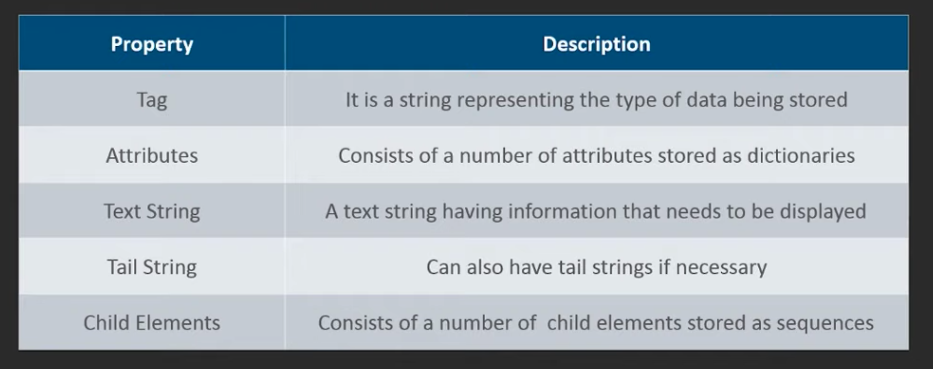    

#### Parsing

This function takes XML in file format to parse it.

Example:   

In [37]:
import xml.etree.ElementTree as ET
mytree = ET.parse('sample.xml')
myroot = mytree.getroot()
print(myroot)

<Element 'metadata' at 0x7fd6564b9540>


In [38]:
data = """<?xml version="1.0" encoding="UTF-8"?>
<metadata>
<food>
    <item name="breakfast">Idly</item>
    <price>$2.5</price>
    <description>
        Two idly's with chutney
    </description>
    <calories>553</calories>
</food>
</metadata>"""
myroot = ET.fromstring(data)
print(myroot.tag)

metadata


#### Finding Elements

You can find various elements and sub-elements using `tag`,`attrib`,`text`,etc.   

Example:

In [39]:
myroot[0]

<Element 'food' at 0x7fd65650fa40>

In [40]:
myroot[0].tag

'food'

In [41]:
for x in myroot[0]:
    print(x)
    print('-'*30)
    print(x.tag, x.attrib)

<Element 'item' at 0x7fd65650fe00>
------------------------------
item {'name': 'breakfast'}
<Element 'price' at 0x7fd65650fe50>
------------------------------
price {}
<Element 'description' at 0x7fd65650fea0>
------------------------------
description {}
<Element 'calories' at 0x7fd65650ff40>
------------------------------
calories {}


In [42]:
for x in myroot[0]:
    print(x.text)

Idly
$2.5

        Two idly's with chutney
    
553


In [43]:
import xml.etree.ElementTree as ET
mytree = ET.parse('sample.xml')
myroot = mytree.getroot()

for x in myroot.findall('food'):
    item = x.find('item').text
    price = x.find('price').text
    print(item, price)

Idly $2.5
Paper Dosa $2.7


#### Modifying

XML can be modified using functions such as `set()`,`SubElement()`,etc.

Example:

In [44]:
import xml.etree.ElementTree as ET
mytree = ET.parse('sample.xml')
myroot = mytree.getroot()

for x in myroot.iter('description'):
    a = str(x.text) + 'Description has been added'
    x.text = str(a)
    x.set('updated', 'yes')
mytree.write('new.xml')

In [45]:
ET.SubElement(myroot[0], 'speciality')
for x in myroot.iter('speciality'):
    b = 'South Indian Specia'
    x.text = str(b)
mytree.write('new2.xml')

In [46]:
myroot[0][0]

<Element 'item' at 0x7fd656501810>

In [47]:
myroot[0][0].attrib.pop('name')
mytree.write('new3.xml')

In [48]:
myroot[0].remove(myroot[0][0])
mytree.write('new4.xml')

In [49]:
myroot[0].clear()
mytree.write('new5.xml')

### xml.dom.minidom

#### Parse()

**parse()**   
This function takes XML in file format to parse it 

Example:

In [51]:
from xml.dom import minidom
data = open('sample.xml')
a = minidom.parse(data)

In [52]:
print(a)

**parseString()**     
This function takes XML as a parameter to parse it.

Example:

In [53]:
data = minidom.parseString('<myxml>Using<empty/> parseString</myxml>')
data

#### Finding Elements

You can find various elements and sub-elements using `GetElementByName()`,`value`,`data`,etc.

Example:

In [54]:
from xml.dom import minidom
mytree = minidom.parse('sample.xml')
tagname = mytree.getElementsByTagName('item')[0]
print(tagname)

<DOM Element: item at 0x7fd656496160>


In [55]:
print(tagname.attributes['name'].value)

breakfast


In [56]:
print(tagname.firstChild.data)

Idly


In [58]:
from xml.dom import minidom
mytree = minidom.parse('sample.xml')
tagname = mytree.getElementsByTagName('item')
for x in tagname:
    print(x.firstChild.data)

Idly
Paper Dosa


#### Length of Elements

You can find the length of the elements using the `len()` function.

Example:

In [59]:
from xml.dom import minidom
mytree = minidom.parse('sample.xml')
tagname = mytree.getElementsByTagName('item')
print(len(tagname))

2
